# Week3 8장 결정 나무
> 4기 윤다빈

## 8.1 문제 정의
**결정 트리 알고리즘을 활용해 연봉 등급 나누기**

## 8.2 라이브러리 및 데이터 불러오기, 데이터 확인하기


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
data = pd.read_csv(file_url, skipinitialspace = True) # ❶

In [2]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


### 변수 설명
- age	: 연령
- workclass	: 고용 형태
- education	: 학력
- education-num	: 교육 연수
- marital-status : 혼인 상태
- occupation : 직업
- relationship : 가족 관계
- race	: 인종
- sex	: 성별
- capital-gain	: 자산 증가
- capital-loss	: 자산 감소
- hours-per-week	: 주당 노동 시간
- native-country	: 본국
- class : 연봉 구분

In [3]:
data['class'].unique() # 고윳값 확인

array(['<=50K', '>50K'], dtype=object)

*$50,000을 기준으로 나뉘어진 데이터*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


#### 특징
- object형 : 텍스트로 구성된 범주형 변수가 많음
- Non-Null Count를 보와 결측치가 있는 변수 (workclass, couupation, native-country)가 있음을 확인할 수 있음

In [5]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


object형의 데이터를 제거하고 통계적 수치를 보여줌

In [6]:
data.describe(include = 'all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 8.3 전처리 : 범주형 데이터

In [7]:
data['class'] = data['class'].map({'<=50K': 0, '>50K': 1})

*50K 이하를 0, 초과를 1로 변경*

### 8.3.1 object형의 변수 정보 확인

In [8]:
data['age'].dtype

dtype('int64')

In [9]:
for i in data.columns:   # ❶ 컬럼명 지정
    print(i, data[i].dtype) # ❷ 컬럼명과 데이터 타입 출력

age int64
workclass object
education object
education-num int64
marital-status object
occupation object
relationship object
race object
sex object
capital-gain int64
capital-loss int64
hours-per-week int64
native-country object
class int64


In [10]:
obj_list = [] # 빈 리스트
for i in data.columns:
    if data[i].dtype == 'object': # ❶
        obj_list.append(i) # ❷

In [11]:
obj_list # 모아진 변수 확인

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

### 8.3.2 전처리할 변수 선별

*각 변수의 고윳값 개수를 nunique()함수를 이용하여 확인*

In [12]:
for i in obj_list:
    print(i, data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


#### 더미변수로 변환
 - 값의 종류가 10 미만인 변수는 그대로 두고, 10개 이상인 변수만 확인하여 조치할지를 검토


In [13]:
for i in obj_list:
    if data[i].nunique() >= 10:
        print(i, data[i].nunique())

education 16
occupation 14
native-country 41


### 8.3.3 education 변수 처리

In [14]:
data['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


> 목표 : 초등 - 학위 과정까지 낮은 것에서 높은 것 순으로 서열화

In [15]:
np.sort(data['education-num'].unique()) # 고윳값을 오름차순으로 확인

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [16]:
data['education-num'] == 1 # 값이 1인지 확인

,education-num
0,False
1,False
2,False
3,False
4,False
...,...
48837,False
48838,False
48839,False
48840,False


*dtype:bool의 의미 -> 불리언, 참 또는 거짓을 저장하는 타입*

In [17]:
data[data['education-num'] == 1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [18]:
data[data['education-num'] == 1]['education'].unique()

array(['Preschool'], dtype=object)

preschool이 가장 첫 번째로 받는 교육이기 때문에 preschool에 한해서 원하는 대로 매핑이 된 것을 확인할 수 있음

모든 숫자에 대해 일대일매핑인지 확인할 차례

In [19]:
for i in np.sort(data['education-num'].unique()):
    print(i, data[data['education-num'] == i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


In [20]:
data.drop('education', axis=1, inplace= True)

### 8.3.4 occupation 변수 처리

In [21]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


- 유사한 직군끼리는 묶여있는 것을 알 수 있음 (farming-fishing 등)
- 더미 변수로 변환하면 변수 14개가 생김

### 8.3.5 native-country 변수 처리

In [22]:
data['native-country'].value_counts()

,count
native-country,
United-States,43832
Mexico,951
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


너무 많은 국가가 존재하기 때문에 비슷한 특성을 가진 나라끼리 묶어 더미변수를 만들 수 있음. 미국이냐 아니냐로 묶을 수도 있지만, 데이터가 간소화되는만큼 정보가 줄어든다는 단점이 있음

In [32]:
data.groupby('native-country').mean(numeric_only=True).sort_values('class')

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074




1.   United States의 평균값 : 0.24 다른 국가들은 United States의 평균값보다 크거나 작아서 전혀 비슷하지 않음
2.   France 중심으로 유럽 국가 : 다른 유럽 국가들이 큰 차이를 보이는 경우가 많음
**3. 각 국가명을 숫자로 변환하여 하나의 변수를 그대로 유지**


**질문 : 교재에 나와있는 코드대로 실습했을 때는 오류가 떴다. 숫자형 변수만 해당한다는 내용을 넣자 오류 사라짐. 클래스를 이미 0과 1로 인코딩했는데도 오류가 뜬 이유가 궁금하다.**

In [33]:
# 'native-country'별로 class의 평균값을 구하는 코드
country_group = data.groupby('native-country').mean(numeric_only=True)['class']

In [34]:
country_group = country_group.reset_index()

In [35]:
country_group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [36]:
data = data.merge(country_group, on = 'native-country', how='left')

data 국가 이름을 기준으로 하여 country_group을 붙이는 형태이기에 data를 메인으로 merge()실행.       

In [37]:
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


class_x와 class_y라는 변수가 생김.


*   class_y를 국가명 대신 사용
*   class_x를 class로 다시 변경



In [38]:
data.drop('native-country', axis=1, inplace=True)
data = data.rename(columns= {'class_x': 'class', 'class_y': 'native-country'})

## 8.4 전처리 : 결측치 처리 및 더미 변수 변환

In [39]:
data.isna().mean() # 결측치 비율 확인

,0
age,0.000000
workclass,0.057307
education-num,0.000000
marital-status,0.000000
occupation,0.057512
relationship,0.000000
race,0.000000
sex,0.000000
capital-gain,0.000000
capital-loss,0.000000


- workclass와 occupation : 약 5%
- native-country : 약 1.7%




In [40]:
data['native-country'] = data['native-country'].fillna(-99)

- 임의의 숫자를 통해 결측치 채우기
- 트리 기반 모델에서는 큰 문제 없으나 선형 모델에서는 데이터의 왜곡을 불러옴

In [41]:
data['workclass'].value_counts() # 고윳값별 출현 빈도 확인

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [42]:
data['workclass'] = data['workclass'].fillna('Private')

In [44]:
data['occupation'].value_counts() # 고윳값별 출현 빈도 확인

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [46]:
# 결측치를 Unknown으로 대체
data['occupation'] = data['occupation'].fillna('Unknown')

In [47]:
data = pd.get_dummies(data, drop_first=True)

## 8.5 모델링 및 평가하기

*데이터를 훈련셋과 시험셋으로 나누기*

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size = 0.4, random_state = 100)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model = DecisionTreeClassifier() # 모델 객체 생성
model.fit(X_train, y_train)      # 학습
pred = model.predict(X_test)     # 예측

In [52]:
from sklearn.metrics import accuracy_score # 임포트
accuracy_score(y_test, pred)               # 정확도 계산

0.8172186108409685

## 8.6 이해하기 : 결정 트리

결정 트리 : 특정 변수에 대한 특정 기준값으로 데이터를 계속 분류해가면서 유사한 그룹으로 묶어내어 예측값을 만드는 알고리즘

### 8.6.1 분류 결정 트리
- 지니 인덱스
> 1 - $\sum_{i=1}^n (p_i)^2$ <br>
> 지니 인덱스는 각 노드에 대해 계산됨. p는 노드 안에 특정 아이템의 비율 <br>
ex. 사과 1, 복숭아 3일 때 : $(0.25)^2 + (0.75)^2 = 0.625$

- 교차 엔트로피
> $-\sum_{i=1}^n (p_i)\times log_2(p_i)$ <br>
ex. 사과 0, 복숭아 4일 때 : <br>

*   사과 0%에 대한 부분 : $0\times Log_2(0)=0$,  
*   복숭아 100%에 대한 부분 : $1 \times Log_2(1)=1 \times 0 = 0 $
*   따라서 교차 엔트로피는 0




### 8.6.2 회귀 결정 트리

첫 번째 노드가 x>c를 기준으로 나눈다고 하자.
- x>c 인 경우에 대해 MSE를 구한다.
- 결정 트리 회귀는 가장 낮은 MSE값이 나오도록 노드를 분류해나감.

## 8.7 오버피팅 문제

**오버피팅 : 예측 모델이 훈련셋을 지나치게 잘 예측한다면 새로운 데이터를 예측할 때 큰 오차를 유발할 수 있음**
따라서 훈련셋을 지나치게 잘 예측하는 모델의 정확도를 일부러 낮춰 오버피팅을 예방할 필요 있음

## 8.8 매개변수 튜닝

In [54]:
model = DecisionTreeClassifier() # 모델 객체 생성
model.fit(X_train, y_train) # 학습
train_pred = model.predict(X_train) # 훈련셋 예측
test_pred = model.predict(X_test) # 시험셋 예측
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred)) # 훈련셋, 시험셋의 정확도 평가

Train score: 0.9780242279474493 Test score: 0.8160925423555305


In [59]:
model = DecisionTreeClassifier(max_depth=5) # 모델 객체 생성
model.fit(X_train, y_train) # 학습
train_pred = model.predict(X_train) # 훈련셋 예측
test_pred = model.predict(X_test) # 시험셋 예측
# print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred)) 훈련셋, 시험셋의 정확도 평가
# 이 행을 실행하면 오류가 뜨는데 왜 뜨는지 모르겠다

In [60]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.8598532673605187 Test score: 0.8541741311357937


## 8.9 트리 그래프

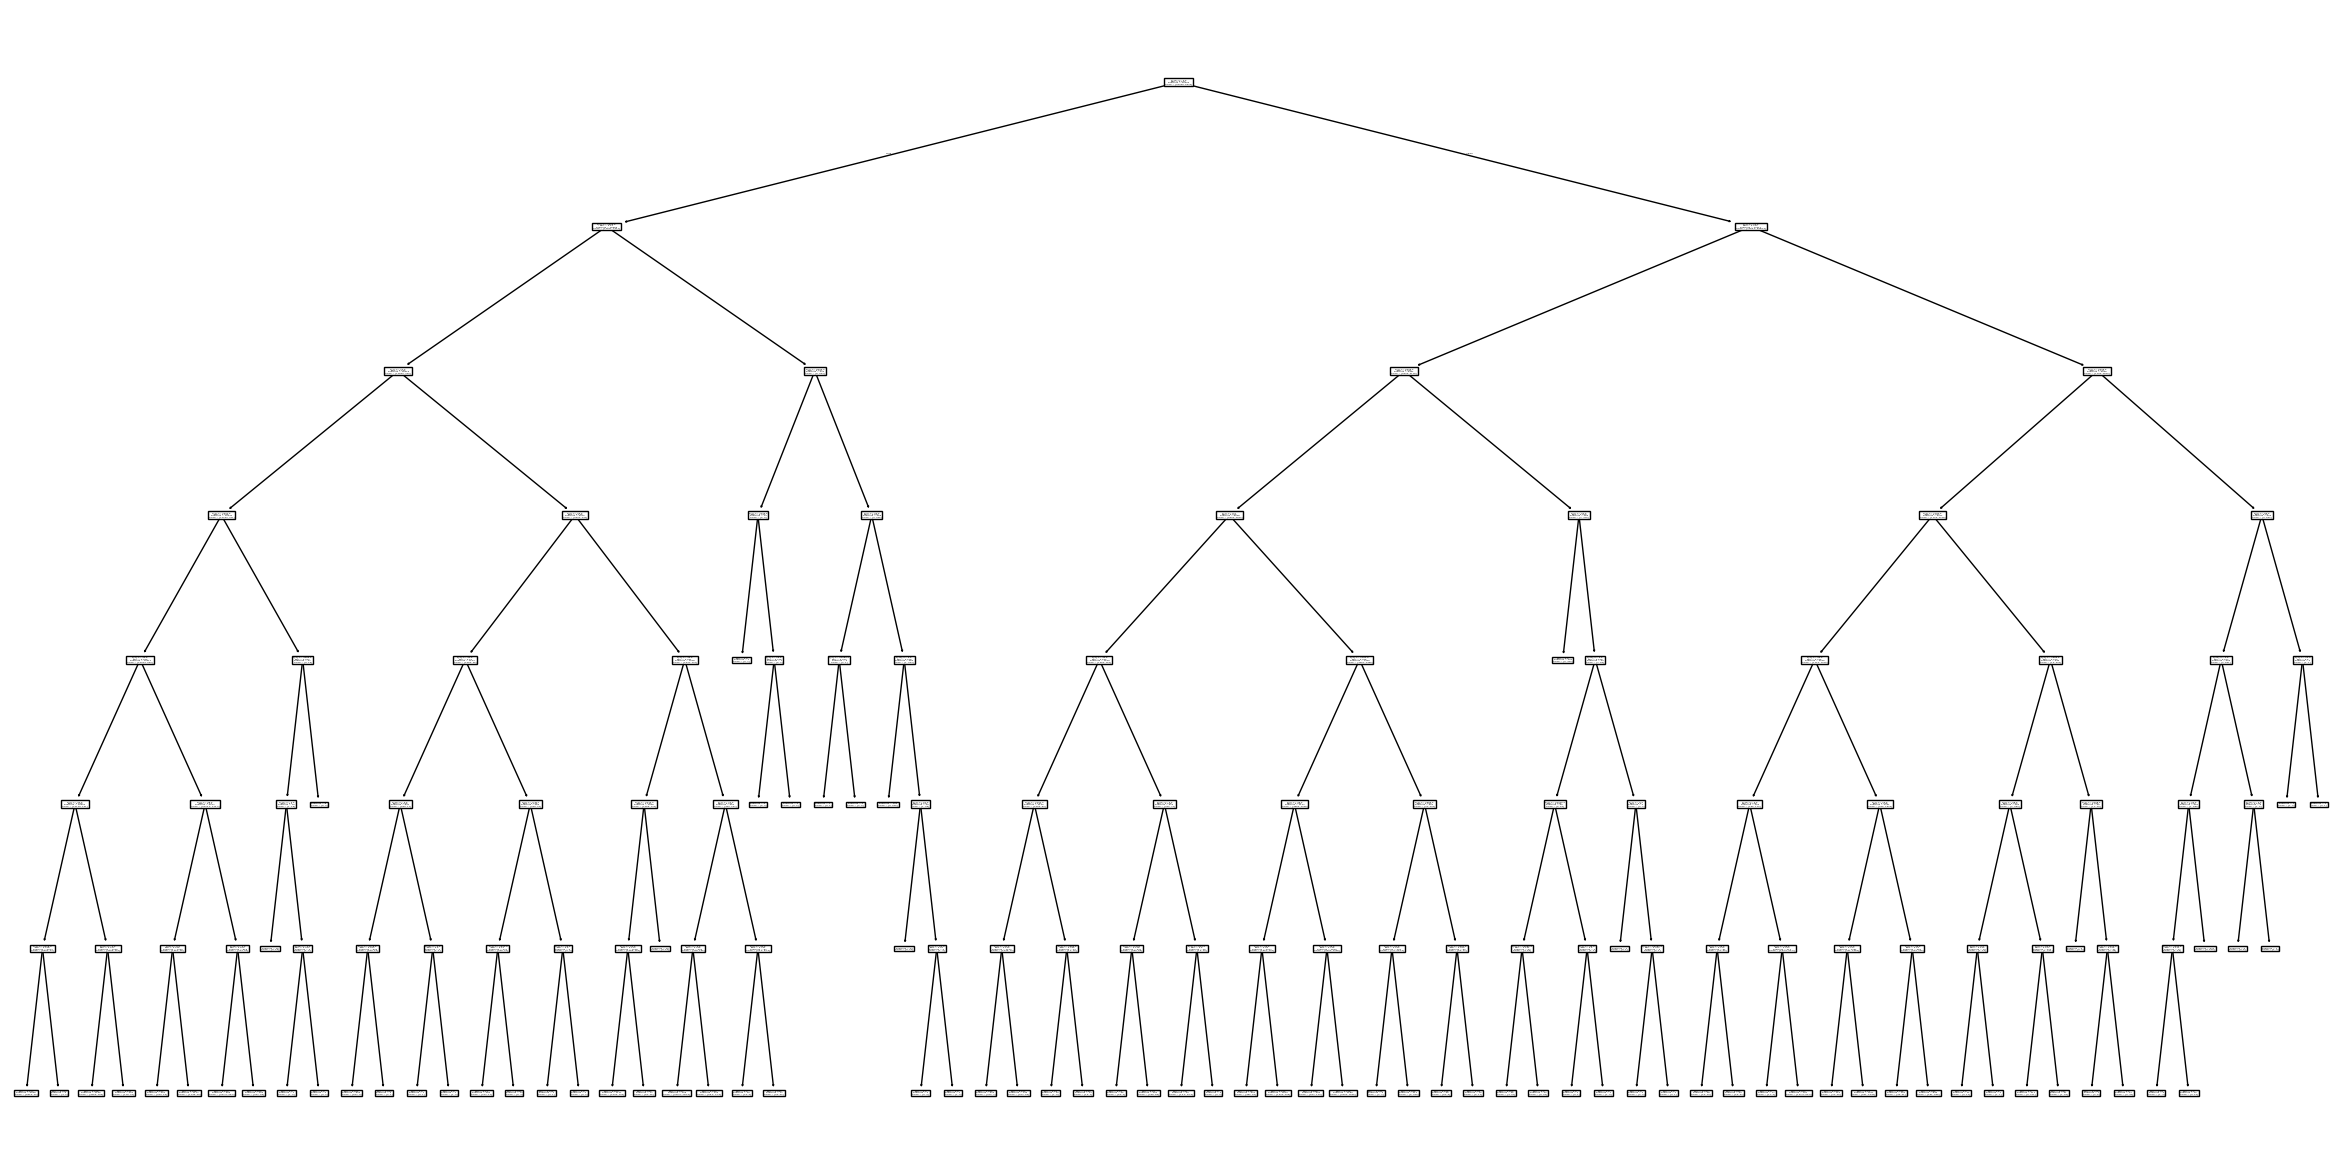

In [62]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15)) # ❶ 그래프 크기 설정
plot_tree(model) # ❷ 트리 그래프 출력
plt.show() # ❸ 불필요한 문자가 나오지 않게 출력


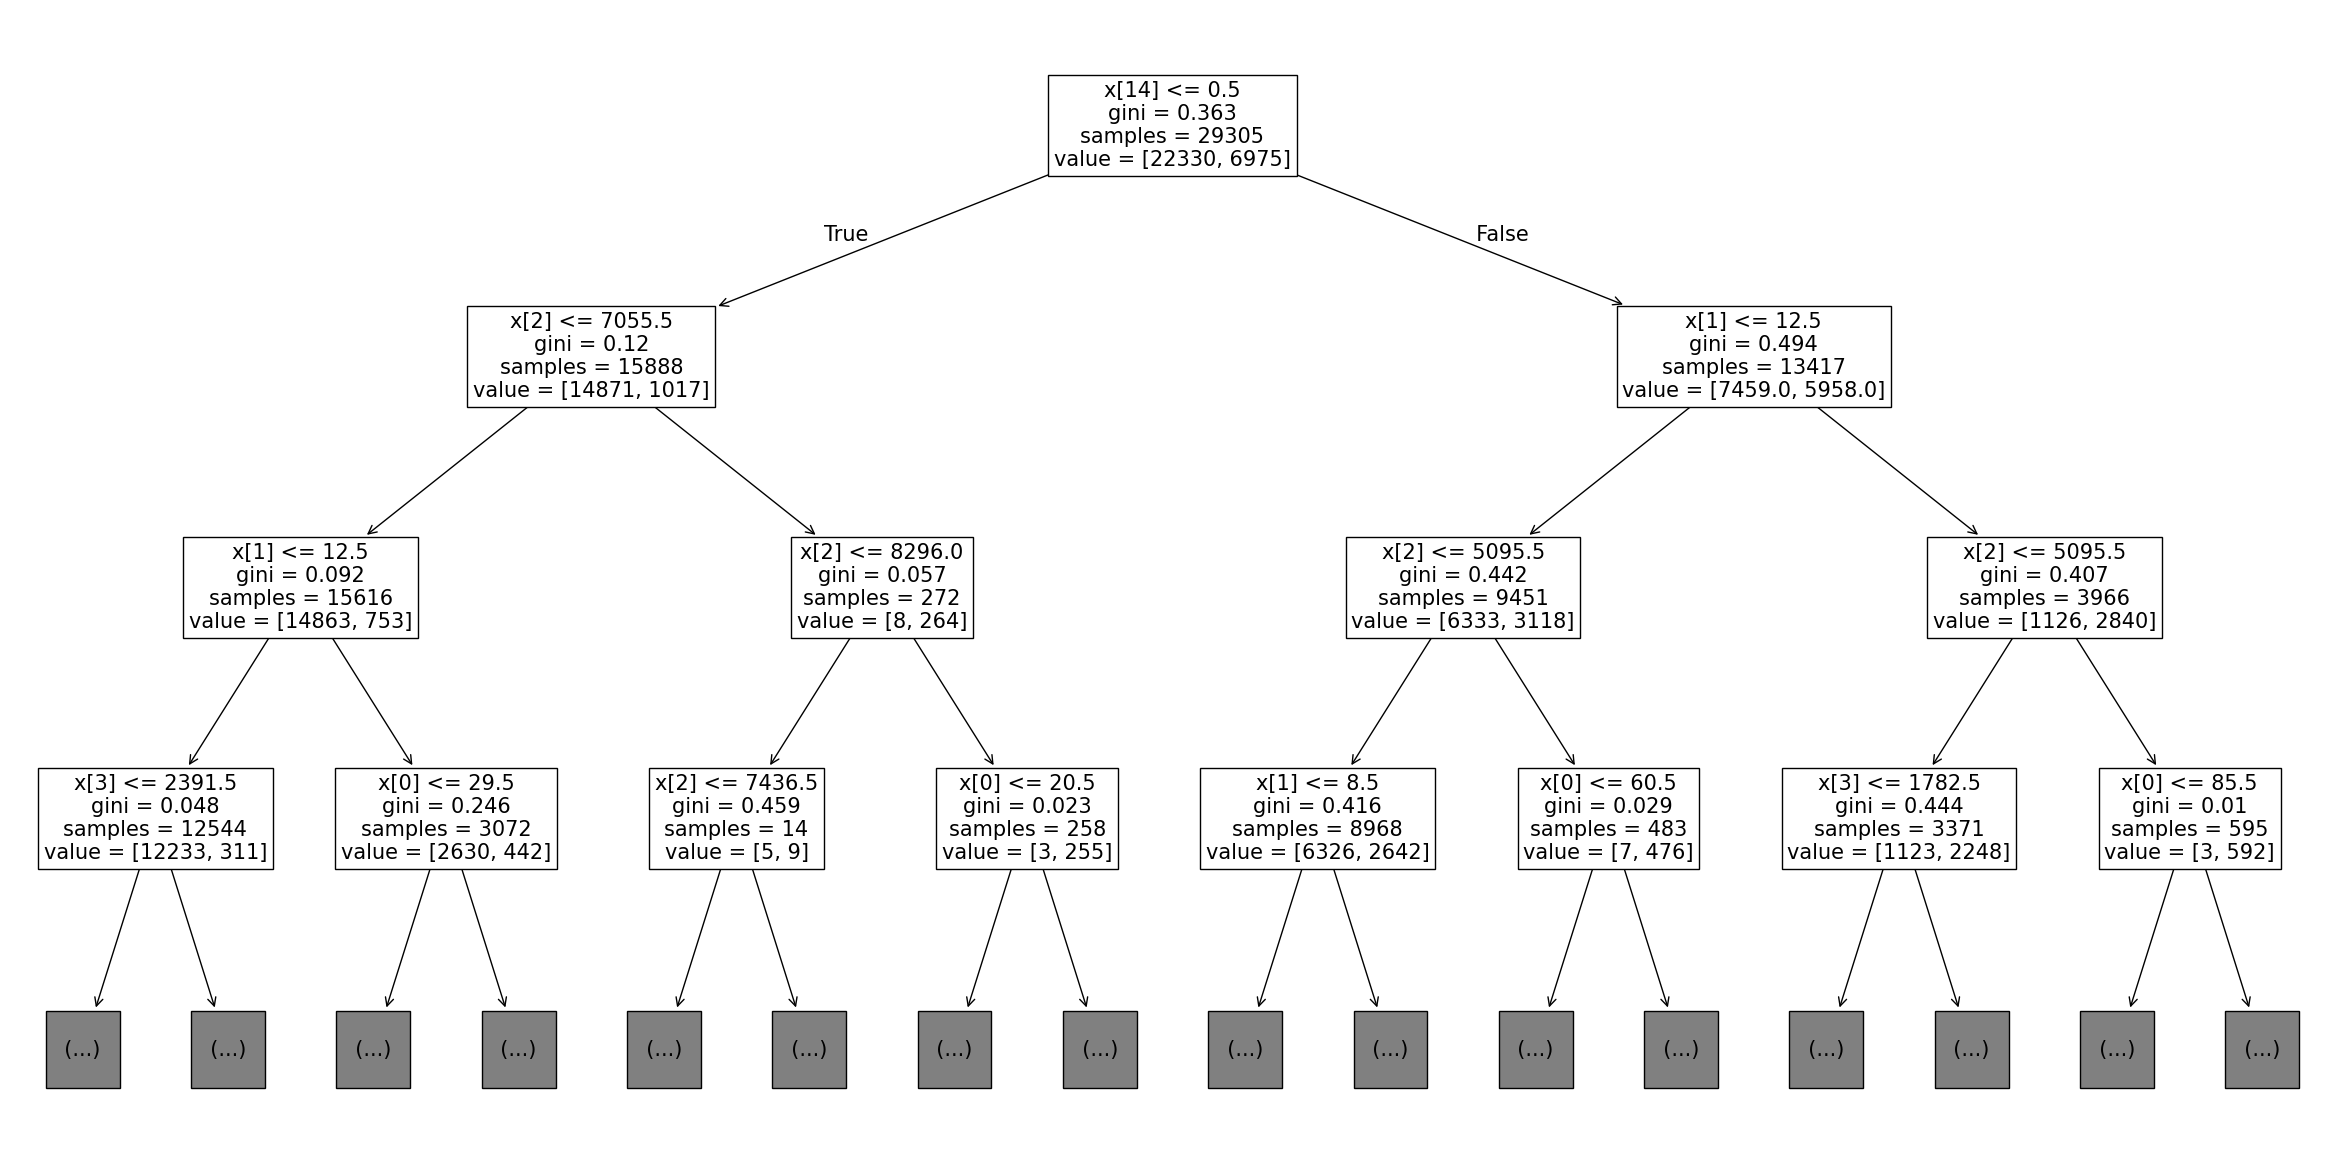

In [64]:
plt.figure(figsize=(30,15)) # 그래프 크기 지정
plot_tree(model, max_depth = 3, fontsize=15) # 깊이와 폰트 크기 조정하여 트리 그래프 출력
plt.show() # 불필요한 문자가 나오지 않게 출력

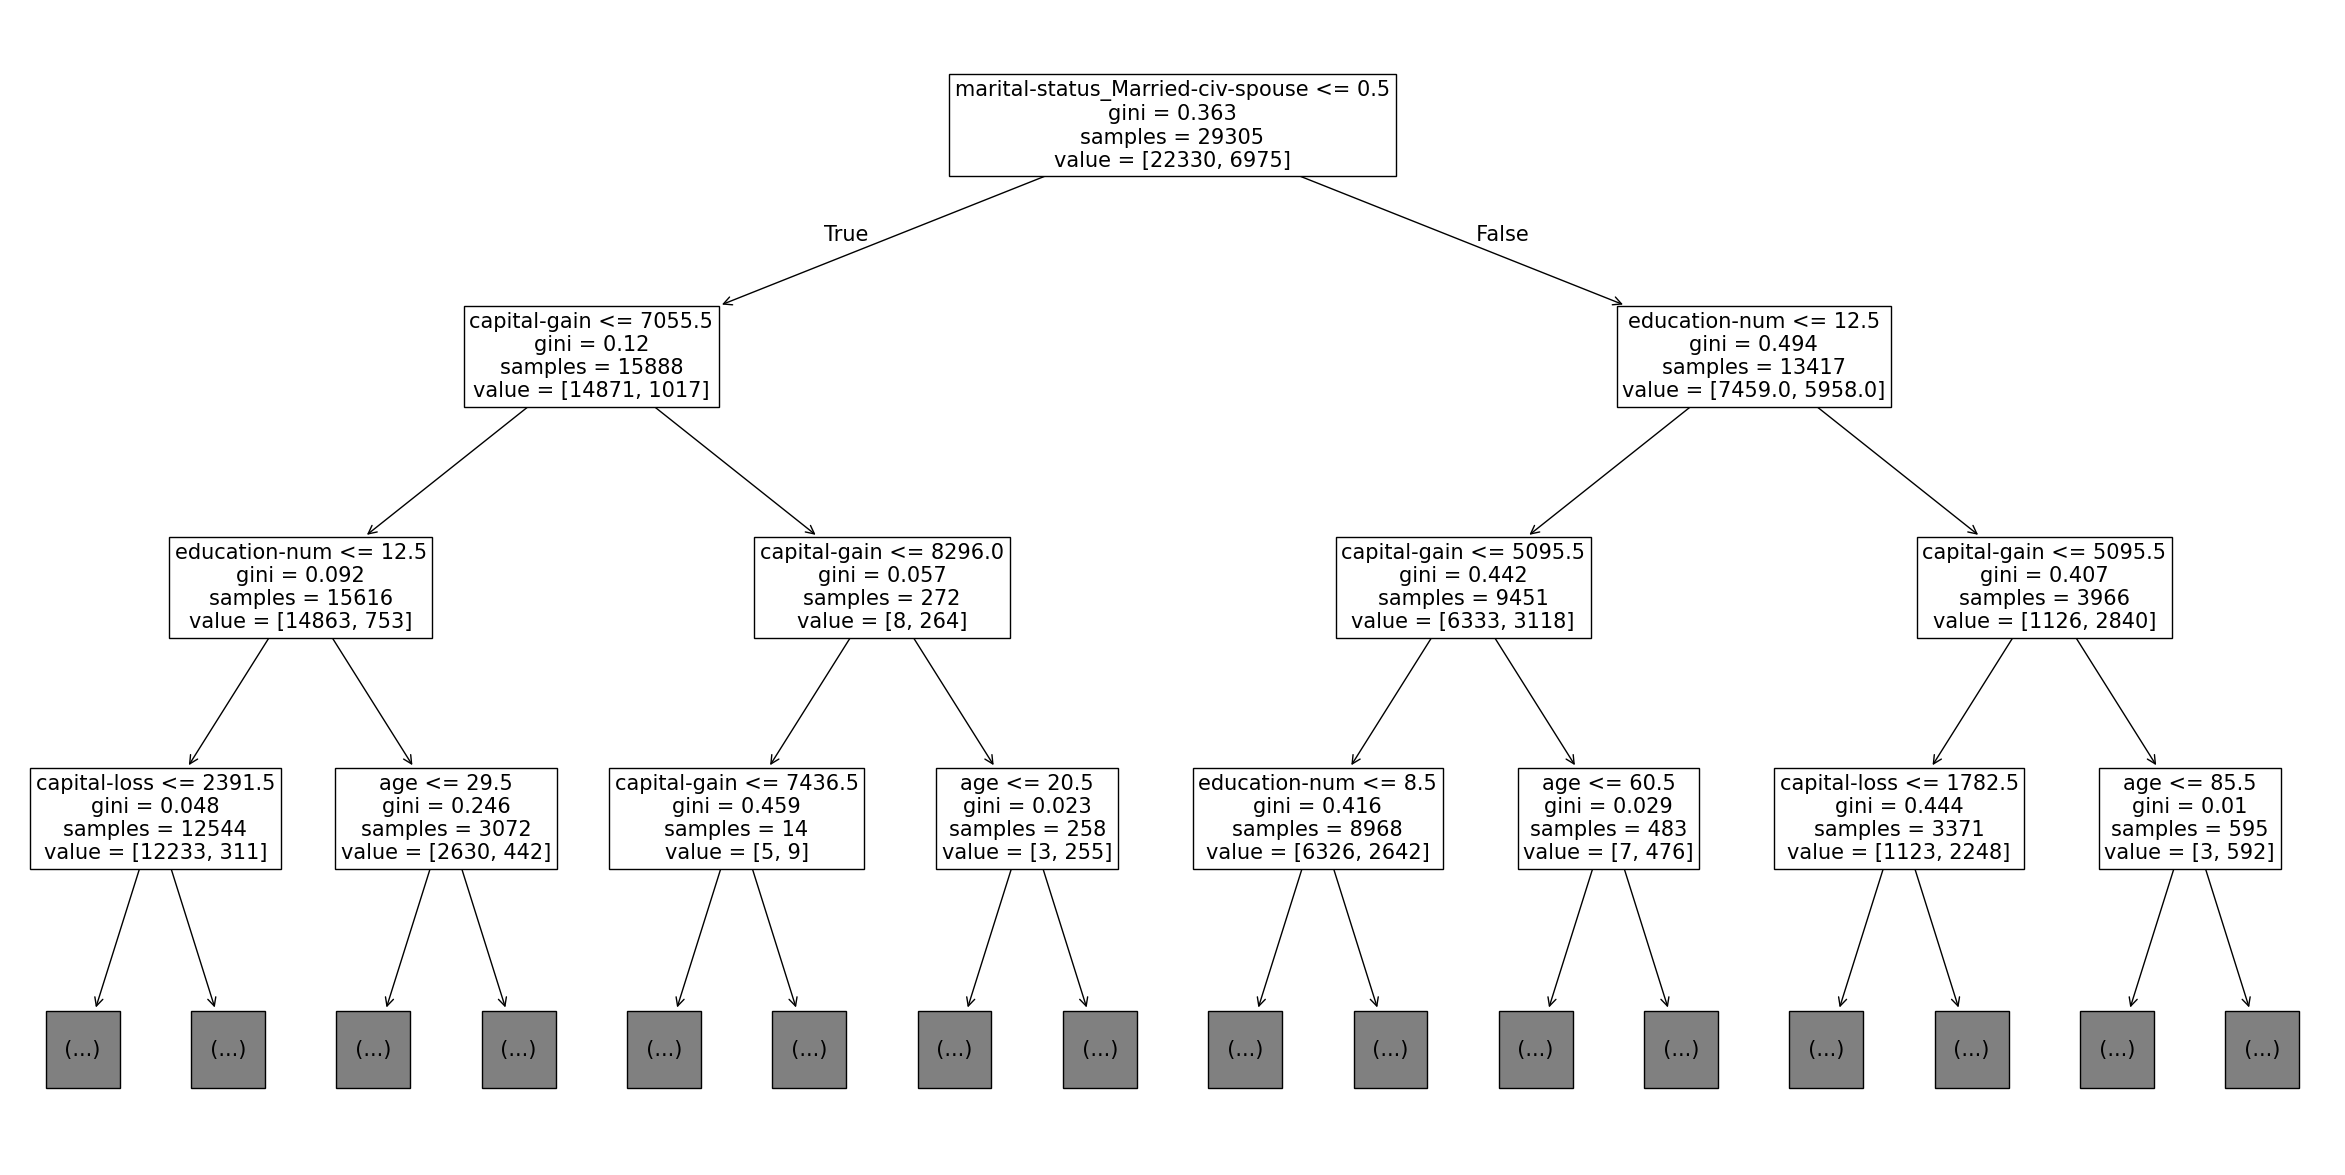

In [65]:
plt.figure(figsize=(30,15)) # 그래프 크기 지정
plot_tree(model, max_depth = 3, fontsize=15, feature_names=X_train.columns) # ❶
plt.show()